## Overview

This script applies different correlation tests on CitiBike data. These tests include:
- **Pearson**: this measures the linear relationship between two samples; it assumes normal distribution in the samples (parametric)
- **Spearman**: this measures monotonicity of two samples; it does not assume normal distributions in the samples (nonparametric)
- **K-S test**: this tests whether two samples are drawn from the same distribution; the distribution assumed to be continuous

The intention is to demonstrate the use of statistical tests under different questions and data type
<br\>
<img src = "https://i.pinimg.com/originals/da/c9/60/dac96086a651aea01b0ef24da4faaa9f.jpg", width = 700, height = 500, align = left>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.style as style
import scipy.stats as stats

style.use("fivethirtyeight")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Ian/anaconda/envs/python36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [119]:
path = "https://s3.amazonaws.com/tripdata/JC-201707-citibike-tripdata.csv.zip"
df = pd.read_csv(path, compression='zip')

In [120]:
df.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
3422,199,2017-07-05 07:15:39,2017-07-05 07:18:59,3270,Jersey & 6th St,40.725289,-74.045572,3186,Grove St PATH,40.719586,-74.043117,26216,Subscriber,1969.0,1
19885,1663,2017-07-19 20:11:16,2017-07-19 20:39:00,3183,Exchange Place,40.716247,-74.033459,3195,Sip Ave,40.730743,-74.063784,26268,Subscriber,1970.0,2
29257,153,2017-07-28 08:12:26,2017-07-28 08:14:59,3279,Dixon Mills,40.721630,-74.049968,3186,Grove St PATH,40.719586,-74.043117,29591,Subscriber,1990.0,1
16698,249,2017-07-17 10:10:13,2017-07-17 10:14:22,3186,Grove St PATH,40.719586,-74.043117,3203,Hamilton Park,40.727596,-74.044247,29531,Subscriber,1994.0,2
29003,1255,2017-07-27 21:45:01,2017-07-27 22:05:56,3198,Heights Elevator,40.748716,-74.040443,3210,Pershing Field,40.742677,-74.051789,26281,Subscriber,1990.0,1
5956,461,2017-07-07 08:34:59,2017-07-07 08:42:40,3205,JC Medical Center,40.716540,-74.049638,3183,Exchange Place,40.716247,-74.033459,29548,Subscriber,1985.0,1
18250,644,2017-07-18 17:05:05,2017-07-18 17:15:50,3202,Newport PATH,40.727224,-74.033759,3213,Van Vorst Park,40.718489,-74.047727,29298,Subscriber,1990.0,1
17029,1561,2017-07-17 17:28:31,2017-07-17 17:54:33,3202,Newport PATH,40.727224,-74.033759,3197,North St,40.752559,-74.044725,29506,Subscriber,1965.0,1
23576,675,2017-07-23 11:36:33,2017-07-23 11:47:49,3199,Newport Pkwy,40.728745,-74.032108,3183,Exchange Place,40.716247,-74.033459,29438,Subscriber,1989.0,1
13524,184,2017-07-13 23:56:03,2017-07-13 23:59:07,3205,JC Medical Center,40.716540,-74.049638,3186,Grove St PATH,40.719586,-74.043117,29665,Subscriber,1986.0,1


In [121]:
df.columns = [col.replace(" ", "_") for col in df.columns]
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bikeid                       int64
usertype                    object
birth_year                 float64
gender                       int64
dtype: object

In [122]:
df = df[df['birth_year'].notnull()]
df['age'] = 2017.0 - df['birth_year']

In [156]:
# Remove rows with NA in Birth Year
ADS = df[(df.age < df.age.quantile(.99)) & \
         (df.tripduration < df.tripduration.quantile(0.99))].sample(1000)

In [157]:
print(ADS.tripduration.describe())
print("\n")
print(ADS.age.describe())

count    1000.000000
mean      511.215000
std       447.960627
min        62.000000
25%       245.000000
50%       361.000000
75%       599.000000
max      2801.000000
Name: tripduration, dtype: float64


count    1000.000000
mean       36.207000
std         9.487791
min        18.000000
25%        29.000000
50%        34.000000
75%        42.000000
max        62.000000
Name: age, dtype: float64


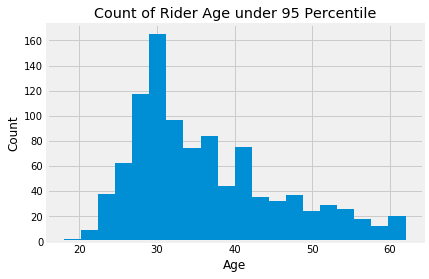

In [158]:
fig = ADS["age"].hist(bins = 20);
fig.set_ylabel("Count");
fig.set_xlabel("Age");
fig.set_title("Count of Rider Age under 95 Percentile");

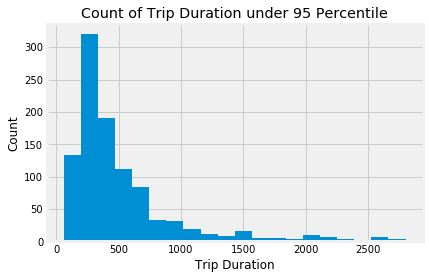

In [159]:
fig = ADS["tripduration"].hist(bins = 20);
fig.set_ylabel("Count");
fig.set_xlabel("Trip Duration");
fig.set_title("Count of Trip Duration under 95 Percentile");

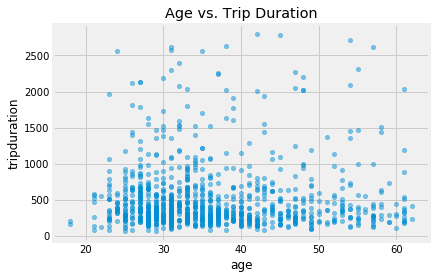

In [160]:
fig = ADS[["age", "tripduration"]].plot(kind = "scatter", alpha = .5, x = "age", y = "tripduration");
fig.set_title("Age vs. Trip Duration");

***

### Key Question
Is there a linear relationship between trip duration (in minutes) and age of rider (with 95% confidence)?

### NULL Hypothesis
There is no linear correlation between trip duration and age of rider.

### Alternative Hypothesis
There is a some linear correlation between trip duration and age of rider (with 95% confidence). 

In [161]:
# Run Pearson Correlation Test
pearson = stats.pearsonr(ADS.age, ADS.tripduration)

print("Pearson Correlation Coefficient: %.3f" % pearson[0])
print("2 tailed p-value: %.3f" % pearson[1])

Pearson Correlation Coefficient: 0.017
2 tailed p-value: 0.588


### Observation of Pearson Test
The p-value is over 5%. Therefore, we cannot rejest the NULL hypothesis. In other words, there is no statistical **linear** relationship between trip duration and Age of riders.
***

### Key Question
Is there a non-linear relationship between trip duration (in minutes) and age of rider (with 95% confidence)?

### NULL Hypothesis
There is no non-linear correlation between trip duration and age of rider.

### Alternative Hypothesis
There is a some non-linear correlation between trip duration and age of rider (with 95% confidence). 

In [165]:
# Run Spearman's Test
spearman = stats.spearmanr(ADS.age, ADS.tripduration)

print("Spearman Correlation Coefficient: %.3f" % spearman[0])
print("2 tailed p-value: %.5f" % spearman[1])

Spearman Correlation Coefficient: -0.059
2 tailed p-value: 0.06313


### Observation of Spearman's Test
The p-value is over 5%. Therefore, we cannot rejest the NULL hypothesis. In other words, there is no statistical **non-linear** relationship between trip duration and Age of riders.

***

### Key Question
Do the trip duration and age of rider have similar distribution (with 95% confidence)?

### NULL Hypothesis
The trip duration and age of rider do not have similar distribution.

### Alternative Hypothesis
The trip duration and age of rider have similar distribution (with 95% confidence).

In [164]:
# Run KS Test

ks = stats.ks_2samp(ADS.age, ADS.tripduration)
print("KS Correlation Coefficient: %.3f" % ks[0])
print("2 tailed p-value: %.3f" % ks[1])

KS Correlation Coefficient: 0.999
2 tailed p-value: 0.000


### Observation of Spearman's Test
The p-value is lower than 5%. Therefore, we can reject the NULL hypothesis. In other words, trip duration and age of rider have the similar underlying distribution.